In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import copy

def lin(x, a, b):
    return a*x + b

height_file = open('gom_data.pickle', 'rb')
height_data = pickle.loads(height_file.read())

height_avg = []
for i, cell in enumerate(height_data[0]):
    average_h = np.mean(cell[1])
    height_avg.append([cell[0], average_h])
    #print(np.average(cell[i][]))

height_avg = np.array(height_avg)


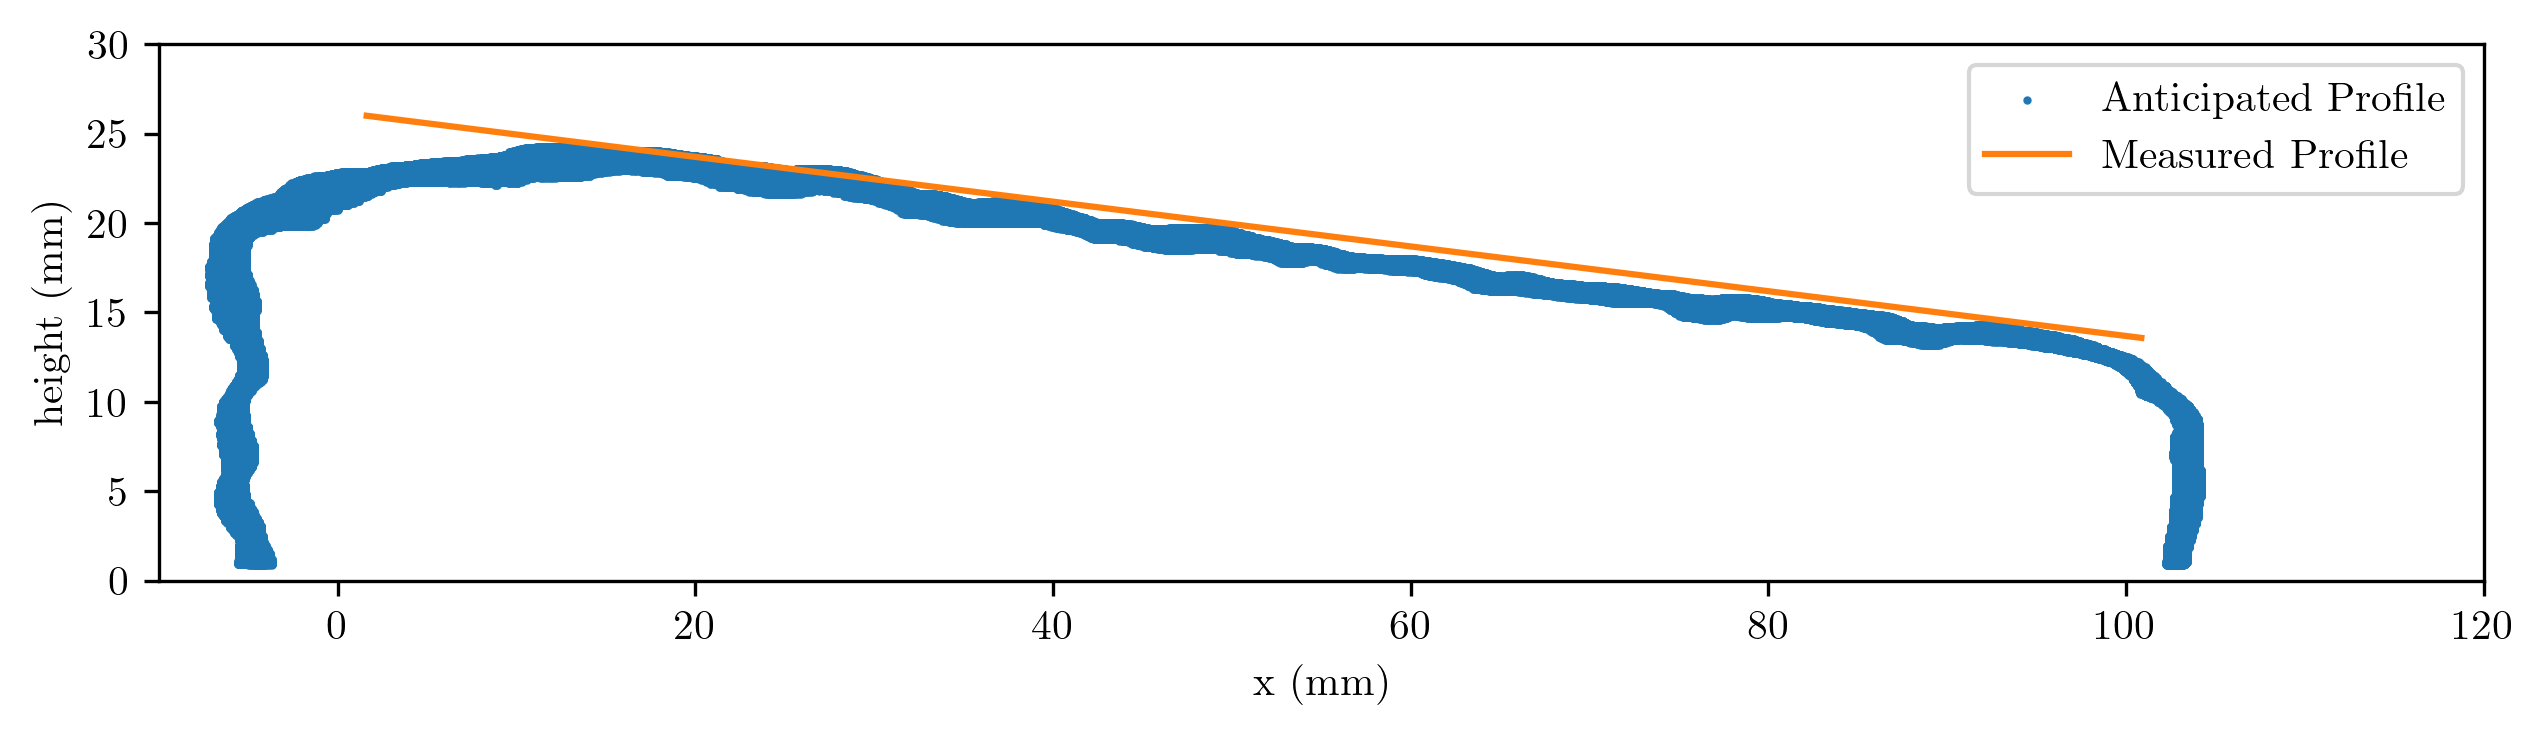

In [9]:
heights = np.array(height_avg)
offset=0
x_vals = np.linspace(-.847,100-1.621)
angle = -1.4269767924865793*5
dist = -209.337227729949+100

b_val = np.tan(np.radians(angle))*dist
slope = b_val/-dist

angle_mod = angle
height_mod = []
for i, x_corrd in enumerate(height_data[0]):
    for j, height in enumerate(x_corrd[1]):
        height_mod.append([x_corrd[0],height])
        #print(height)
#height_mod = copy.deepcopy(heights) #heights[lower_lim:upper_lim]
height_mod = np.array(height_mod)

x_offset = np.array([x+offset for x in x_vals])
line = lin(x_vals, slope, b_val)
lower_lim = 15
upper_lim = 1090
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig,ax = plt.subplots(1,1)
fig.dpi=300
ax.scatter(-height_mod[:,0]+100, height_mod[:,1],s=1)
ax.plot(-x_offset+100,line,'C1')
ax.legend(["Measured Profile", "Anticipated Profile"])
ax.set_aspect('equal')
ax.set_ylim(0,30)
ax.set_xlim(-10,120)
ax.set_xlabel("x (mm)")
ax.set_ylabel("height (mm)")
fig.set_figwidth(10)
plt.show()

In [3]:
# rotate to flat


print(height_mod[upper_lim])
for i in range(len(height_mod)):
    x_o = height_mod[i,0]
    y_o = height_mod[i,1]

    height_mod[i,0] = dist+(x_o-dist)*np.cos(np.radians(angle_mod))-(y_o*np.sin(np.radians(angle_mod)))

    height_mod[i,1] = (x_o-dist)*np.sin(np.radians(angle_mod))+y_o*np.cos(np.radians(angle_mod))

[-4.1         7.07383279]


In [4]:
upper_lim = 1254799
lower_lim = 436443

print(height_mod[upper_lim])
print(height_mod[lower_lim])

[79.99831181 -0.54593222]
[20.00233094 -0.7987551 ]


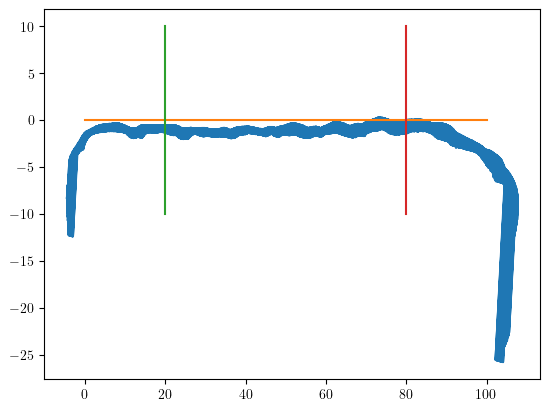

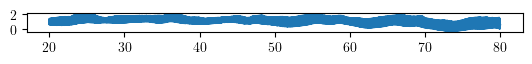

RMS from expected:  1.0388819148838409


In [5]:







fig,ax = plt.subplots()
ax.plot(height_mod[:,0], height_mod[:,1])
ax.plot([0,100],[0, 0])
ax.plot([20, 20],[-10,10])
ax.plot([80,80], [-10,10])
plt.show()

error=0-height_mod[lower_lim:upper_lim,1]
plt.plot(height_mod[lower_lim:upper_lim,0],error)
plt.gca().set_aspect('equal')
plt.show()
rms = np.sqrt(np.sum(error**2)/len(error))
print("RMS from expected: ", rms)

-0.9675534037316779
RMS from average:  0.3783068119925419
Maximum Error:  1.060814374119504
Number of Datapoints:  818356


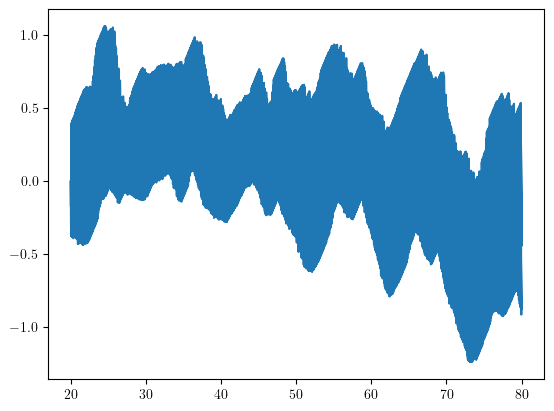

In [6]:
average_top_surface = np.average(height_mod[lower_lim:upper_lim,1])
print(average_top_surface)

error=average_top_surface-height_mod[lower_lim:upper_lim,1]
rms = np.sqrt(np.sum(error**2)/len(error))
print("RMS from average: ",rms)
print("Maximum Error: ", max(error))

print("Number of Datapoints: ", len(error))

plt.plot(height_mod[lower_lim:upper_lim,0],error)
plt.show()